In [1]:

import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels as sm1
import matplotlib.pyplot as plt
import warnings
from itertools import product
from datetime import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\PDudukin\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Загрузка данныех за май 2016 года

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
yellow_tripdata_2016_05 = pd.read_csv('D:/Data/yellow_tripdata_2016-05.csv',sep = ',',
                                      parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'], 
                                      date_parser=dateparse)

MemoryError: 

In [4]:
yellow_tripdata_2016_05.info()
yellow_tripdata_2016_05.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(12), int64(4), object(1)
memory usage: 1.7+ GB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


### Фильтрация

In [5]:
#нулевой длительностью
#нулевым количеством пассажиров
#нулевым расстоянием поездки по счётчику
#координатами начала, не попадающими в прямоугольник Нью-Йорка -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553

yellow_tripdata_2016_05 = yellow_tripdata_2016_05[(yellow_tripdata_2016_05.passenger_count>0) &
                                                 (yellow_tripdata_2016_05.trip_distance>0) & 
                                                 ((-74.25559 <= yellow_tripdata_2016_05.pickup_longitude) & 
                                                  (-73.70001 >= yellow_tripdata_2016_05.pickup_longitude) & 
                                                    (40.49612 <= yellow_tripdata_2016_05.pickup_latitude) & 
                                                    (40.91553 >= yellow_tripdata_2016_05.pickup_latitude))]



In [6]:
yellow_tripdata_2016_05['delta'] = yellow_tripdata_2016_05.tpep_dropoff_datetime - yellow_tripdata_2016_05.tpep_pickup_datetime
yellow_tripdata_2016_05['delta'] = yellow_tripdata_2016_05['delta'].apply(lambda x : x.total_seconds())
yellow_tripdata_2016_05 = yellow_tripdata_2016_05[(yellow_tripdata_2016_05.delta>0)]

In [7]:
yellow_tripdata_2016_05.info()
yellow_tripdata_2016_05.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 20 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
delta                    float64
dtypes: datetime64[ns](2), float64(13), int64(4), object(1)
memory usage: 1.8+ GB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1051.0
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,451.0
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,421.0
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1187.0
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,399.0


In [8]:
regions = pd.read_csv('regions.csv',sep = ';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [21]:


for index, r  in regions.iterrows():
    
    yellow_tripdata_2016_05.ix[(r['west'] <= yellow_tripdata_2016_05.pickup_longitude) & 
                               (r['east'] > yellow_tripdata_2016_05.pickup_longitude) & 
                               (r['south'] <= yellow_tripdata_2016_05.pickup_latitude) & 
                               (r['north'] > yellow_tripdata_2016_05.pickup_latitude), 'pickup_region'] = r['region']


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [174]:
from datetime import datetime
yellow_tripdata_2016_05['tpep_pickup_datetime_h'] = yellow_tripdata_2016_05.tpep_pickup_datetime.apply(
    lambda x : pd.Timestamp(datetime(x.year, x.month, x.day,x.hour))  )
yellow_tripdata_2016_05['tpep_pickup_datetime_h1'] = yellow_tripdata_2016_05.tpep_pickup_datetime.apply(
    lambda x : (x.day-1) *24+x.hour)  
#str(x.day) +'_'+ str(x.day)
yellow_tripdata_2016_05.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta,pickup_region,tpep_pickup_datetime_h,tpep_pickup_datetime_h1
4700492,1,2016-05-13 01:18:56,2016-05-13 01:19:19,1,1.6,-74.255165,40.899872,5,N,-74.255180,...,0.0,0.0,10.0,12.0,0.3,111.3,23.0,49.0,2016-05-13 01:00:00,289
10226091,1,2016-05-26 23:14:20,2016-05-26 23:14:44,1,2.5,-74.255142,40.899807,5,N,-74.255165,...,0.0,0.0,10.0,12.0,0.3,111.3,24.0,49.0,2016-05-26 23:00:00,623
6379180,1,2016-05-17 04:07:34,2016-05-17 04:07:37,1,0.2,-74.255066,40.899746,1,N,-74.255066,...,0.5,0.5,0.0,0.0,0.3,3.8,3.0,49.0,2016-05-17 04:00:00,388
6379191,1,2016-05-17 04:07:55,2016-05-17 04:08:19,1,0.2,-74.255058,40.899765,5,N,-74.255058,...,0.0,0.0,10.0,12.0,0.3,111.3,24.0,49.0,2016-05-17 04:00:00,388
9849626,1,2016-05-25 23:37:20,2016-05-25 23:37:41,1,3.3,-74.254913,40.899506,5,N,-74.254845,...,0.0,0.0,10.0,12.0,0.3,111.3,21.0,49.0,2016-05-25 23:00:00,599


### Агрегация данных за май 2016 года по часам и областям 

In [176]:
hbins = np.unique(yellow_tripdata_2016_05.tpep_pickup_datetime_h.values)
rbins = np.array(regions.region.values)
res = stats.binned_statistic_2d(
                                yellow_tripdata_2016_05.tpep_pickup_datetime_h1.values,
                                yellow_tripdata_2016_05.pickup_region.values,
                                None,'count',
                                bins = [24*31,2500],range = [[0,24*31-1],[1,2500]])


In [177]:
res.statistic.shape, hbins.shape,rbins.shape

((744, 2500), (744,), (2500,))

In [178]:
dfres = pd.DataFrame(data = res.statistic, index = hbins, columns=rbins)
dfres.head()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2016-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Количество поездок за день от Empire State Building

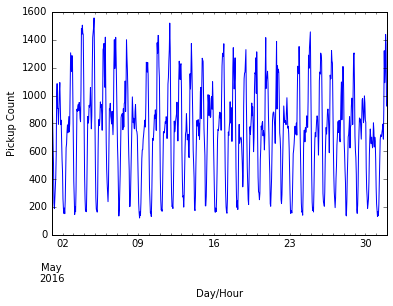

In [181]:
esb_longitude = -73.985428
esb_latitude = 40.748817


esb_region = regions[(regions['west'] < esb_longitude) & (regions['east'] > esb_longitude) 
              & (regions['south'] < esb_latitude) & (regions['north'] > esb_latitude)].region.values[0]


plt.ylabel('Pickup Count')
plt.xlabel('Day/Hour')

dfres[dfres.columns[esb_region]].plot()
pylab.show()

### Количество пар час-ячейка, для которых не было совершено ни одной поездки.

In [188]:
dfres[dfres == 0].count().sum() 

1718238